<a href="https://colab.research.google.com/github/yeturivani-s/Ecommerce_NLP_textclassification/blob/main/Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install texthero
!pip install -U spacy
!python -m spacy download ru_core_news_sm
import spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 2.9 MB/s 
     |████████████████████████████████| 10.4 MB 14.0 MB/s 
     |████████████████████████████████| 184 kB 74.7 MB/s 
     |████████████████████████████████| 1.0 MB 50.9 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfully uninstalled srsly-2.4.4
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.0
    Uninstalling thinc-8.1.0:
      Successfully uninstalled thinc-8.1.0
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.1
    Uninstalling spacy-3.4.1:
      Successfully uninstalled spacy-3.4.1
ERROR: pip's dependency resolver does not currently take into

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("/content/ecommerceDataset.csv", names=["labels", "descriptions"])
descriptions = df["descriptions"].map(str).values.tolist()
labels = df["labels"].values.tolist()
series_desc = pd.Series(descriptions)

le = LabelEncoder()
labels = le.fit_transform(labels).tolist()

In [3]:
import texthero as hero
from sklearn.feature_extraction.text import TfidfVectorizer
series_des=hero.clean(series_desc)
### Stopwords
data_s = hero.remove_stopwords(series_des)
#let's create the vectorizer and fit the corpus and transform them accordingly
v = TfidfVectorizer()
v.fit(data_s)
transform_output = v.transform(data_s)

#hero.scatterplot(df, 'pca', color='labels', title="ecommerce")



In [4]:
print(data_s)

0        paper plane design framed wall hanging motivat...
1        saf floral framed painting wood inch x inch sp...
2        saf uv textured modern art print framed painti...
3        saf flower print framed painting synthetic inc...
4        incredible gifts india wooden happy birthday u...
                               ...                        
50420    strontium microsd class 8gb memory card black ...
50421    crossbeats wave waterproof bluetooth wireless ...
50422    karbonn titanium wind w4 white karbonn titaniu...
50423    samsung guru fm plus sm b110e black colour bla...
50424                       micromax canvas win w121 white
Length: 50425, dtype: object


In [5]:
print(v.vocabulary_)

{'paper': 51408, 'plane': 53231, 'design': 22538, 'framed': 30042, 'wall': 73868, 'hanging': 33441, 'motivational': 46724, 'office': 49674, 'decor': 21809, 'art': 9896, 'prints': 54826, 'inch': 36432, 'set': 61674, 'painting': 51174, 'made': 43369, 'synthetic': 67377, 'frame': 30040, 'uv': 72277, 'textured': 68482, 'print': 54803, 'gives': 31624, 'multi': 47144, 'effects': 25562, 'attracts': 10483, 'towards': 69695, 'special': 64511, 'series': 61620, 'paintings': 51175, 'makes': 43649, 'beautiful': 11990, 'royal': 59460, 'touch': 69646, 'ready': 57061, 'hang': 33433, 'would': 75459, 'proud': 55365, 'possess': 54033, 'unique': 71569, 'niche': 48501, 'apart': 9312, 'use': 72125, 'modern': 46216, 'efficient': 25575, 'printing': 54818, 'technology': 68092, 'inks': 37060, 'precision': 54430, 'epson': 26719, 'roland': 59198, 'hp': 35180, 'printers': 54815, 'innovative': 37111, 'hd': 33839, 'technique': 68077, 'results': 58382, 'durable': 24822, 'spectacular': 64584, 'looking': 42628, 'highes

In [6]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    
    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)
    
    #get the score
    idf_score = v.idf_[indx]
    
    print(f"{word} : {idf_score}")

Streaming output truncated to the last 5000 lines.
unsentimental : 10.03650272483054
unserious : 10.729649905390483
unsettling : 8.650208363710647
unshakable : 10.218824281624492
unshelled : 10.218824281624492
unshielded : 10.729649905390483
unsightly : 9.055673471818812
unskilled : 9.120211992956383
unsolvable : 11.135115013498648
unsolved : 8.532425328054265
unsophisticated : 11.135115013498648
unsparing : 9.748820652378758
unsparingly : 10.729649905390483
unspeakable : 10.03650272483054
unspoilt : 10.218824281624492
unspoken : 9.88235204500328
unspooling : 11.135115013498648
unspools : 9.748820652378758
unstable : 9.120211992956383
unstainable : 11.135115013498648
unstiched : 11.135115013498648
unstilted : 11.135115013498648
unstinted : 9.748820652378758
unstitched : 7.339625824326453
unstoppable : 8.650208363710647
unstore : 10.729649905390483
unstrained : 11.135115013498648
unstretched : 10.441967832938703
unstructured : 11.135115013498648
unstuck : 11.135115013498648
unsub : 11.1

In [8]:
print(df.shape)

(50425, 2)


In [7]:
#check the distribution of labels 
df['labels'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: labels, dtype: int64

In [9]:
#Add the new column which gives a unique number to each of these labels 

df['label_num'] = df['labels'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

#checking the results 
df.head(5)

,labels,descriptions,label_num
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,0
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0
4,Household,Incredible Gifts India Wooden Happy Birthday U...,0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.descriptions, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [11]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (40340,)
Shape of X_test:  (10085,)


In [12]:
X_train.head()

34692    Status Quo Men's Synthetic Jacket Status Quo j...
12959    Inalsa Professional 2-Litre Deep Fryer (Black/...
20996    The Loney Review Winner of the Costa First Nov...
9828     Treo By Milton Cube Jar 310Ml, Set Of 6 Glassw...
28795    Foundations of Periodontics for the Dental Hyg...
Name: descriptions, dtype: object

In [14]:
y_train.value_counts()

0    15450
1     9456
2     8497
3     6937
Name: label_num, dtype: int64

In [15]:
y_test.value_counts()

0    3863
1    2364
2    2124
3    1734
Name: label_num, dtype: int64

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train.astype(str) , y_train.astype(str) )


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test.astype(str) )


#4. print the classfication report
print(classification_report(y_test.astype(str) , y_pred.astype(str) ))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3863
           1       0.97      0.96      0.96      2364
           2       0.96      0.94      0.95      2124
           3       0.97      0.97      0.97      1734

    accuracy                           0.96     10085
   macro avg       0.96      0.96      0.96     10085
weighted avg       0.96      0.96      0.96     10085



In [19]:
X_test[:5]

41536    Seagate 4TB Backup Plus Hub USB 3.0 Desktop 3....
9671     Sunflame GT Pride 2 Burner Gas Stove, Black St...
49630    iVoltaa Next Gen Compact Wired Selfie Stick fo...
33658    TWO DOTS Air Bra for Girls and Women Combo of ...
19317    The Secret of Secrets: The Secrets of the Gold...
Name: descriptions, dtype: object

In [20]:
y_test[:5]

41536    2
9671     0
49630    2
33658    3
19317    1
Name: label_num, dtype: int64

In [21]:
y_pred[:5]

array(['2', '0', '2', '3', '1'], dtype=object)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(str), y_pred.astype(str))
cm

array([[3755,   35,   46,   27],
       [  66, 2263,   25,   10],
       [  87,   27, 2001,    9],
       [  29,    8,    9, 1688]])

Text(69.0, 0.5, 'Truth')

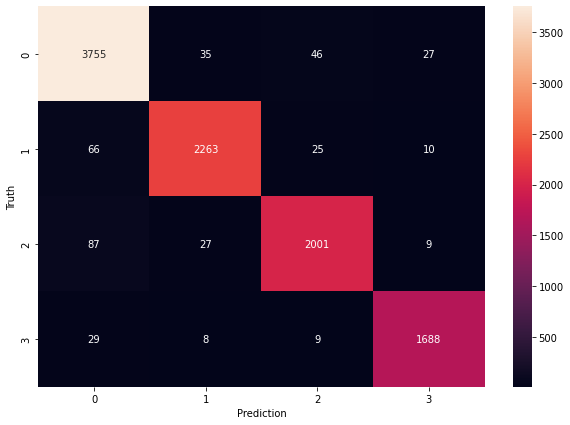

In [24]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# 2nd method

In [25]:
from sklearn.ensemble import RandomForestClassifier
#1. create a pipeline object
clf_R = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf_R.fit(X_train.astype(str), y_train.astype(str))


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test.astype(str))


#4. print the classfication report
print(classification_report(y_test.astype(str), y_pred.astype(str)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3863
           1       0.97      0.96      0.96      2364
           2       0.96      0.94      0.95      2124
           3       0.97      0.97      0.97      1734

    accuracy                           0.96     10085
   macro avg       0.96      0.96      0.96     10085
weighted avg       0.96      0.96      0.96     10085



In [26]:
X_test[:5]

41536    Seagate 4TB Backup Plus Hub USB 3.0 Desktop 3....
9671     Sunflame GT Pride 2 Burner Gas Stove, Black St...
49630    iVoltaa Next Gen Compact Wired Selfie Stick fo...
33658    TWO DOTS Air Bra for Girls and Women Combo of ...
19317    The Secret of Secrets: The Secrets of the Gold...
Name: descriptions, dtype: object

In [27]:
y_test[:5]

41536    2
9671     0
49630    2
33658    3
19317    1
Name: label_num, dtype: int64

In [28]:
y_pred[:5]

array(['2', '0', '2', '3', '1'], dtype=object)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype(str), y_pred.astype(str))
cm

array([[3755,   35,   46,   27],
       [  66, 2263,   25,   10],
       [  87,   27, 2001,    9],
       [  29,    8,    9, 1688]])

Text(69.0, 0.5, 'Truth')

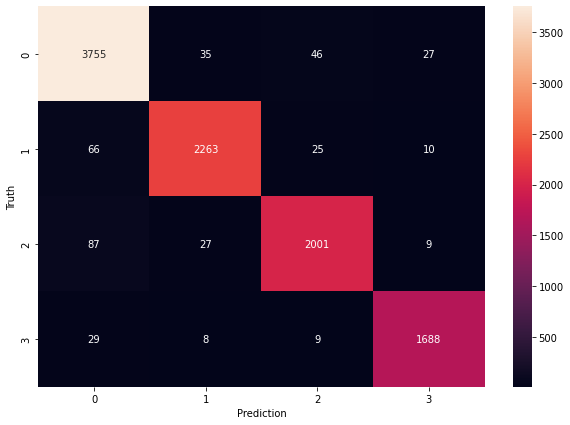

In [30]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')